In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
customer_data = pd.read_csv('C:/Users/Rahul/Desktop/DSA/Data_Science/Customer_Segmentation/data/raw/Mall_Customers.csv')

In [10]:
print(customer_data.info())
print(customer_data.describe())

# Check for missing values
print(customer_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

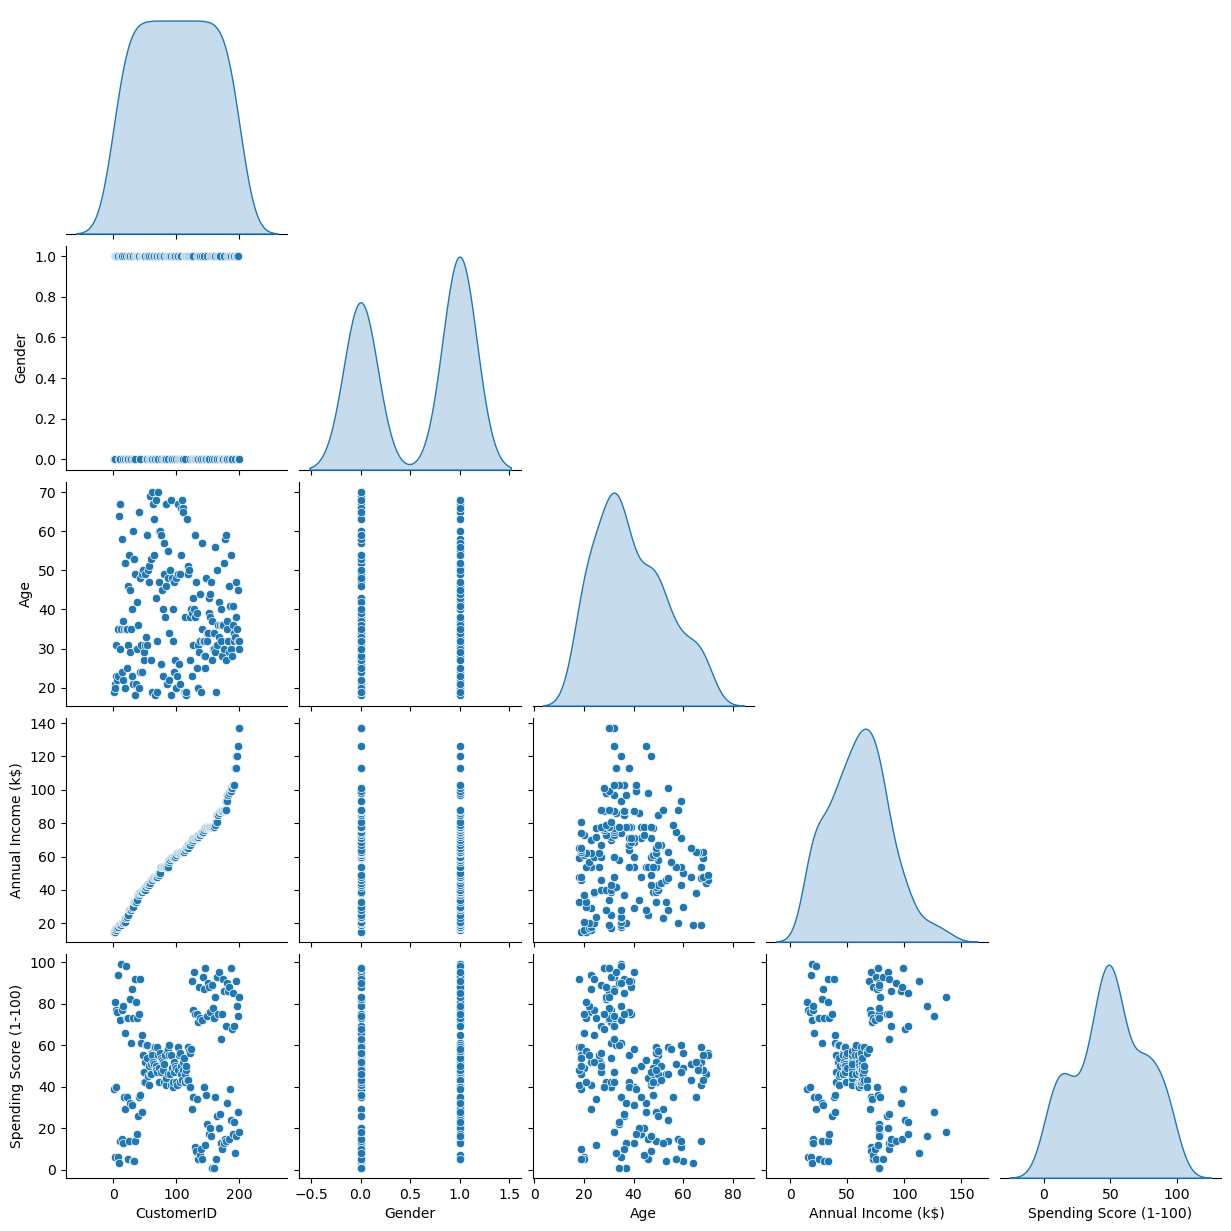

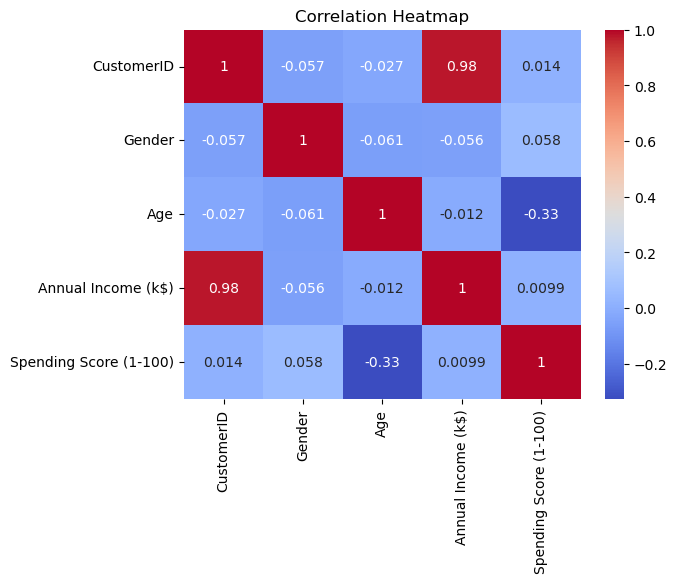

In [12]:
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})

sns.pairplot(customer_data, diag_kind='kde', corner=True)
plt.show()

sns.heatmap(customer_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


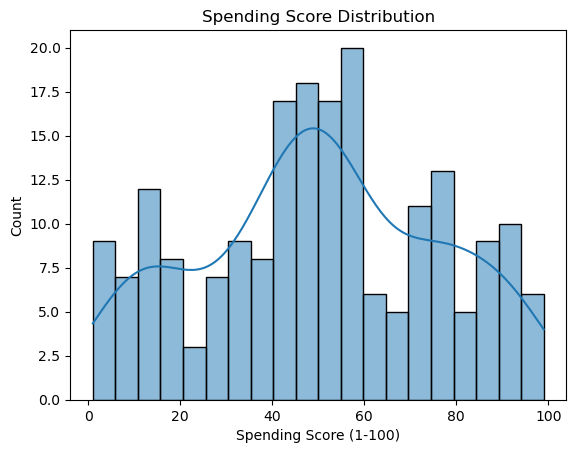

In [13]:
# Distribution of Spending Score
sns.histplot(customer_data['Spending Score (1-100)'], kde=True, bins=20)
plt.title("Spending Score Distribution")
plt.show()

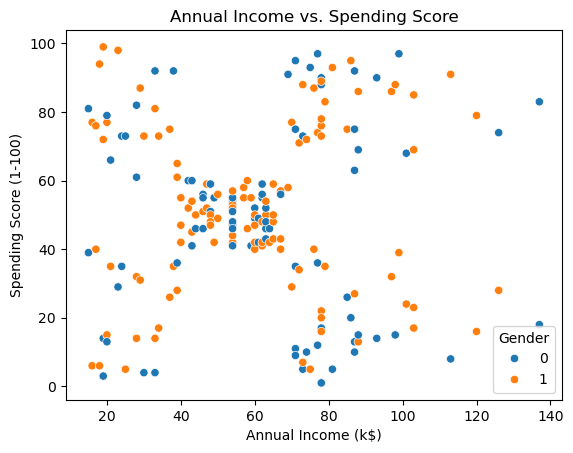

In [14]:
# Scatter plot for Annual Income vs. Spending Score
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Annual Income vs. Spending Score")
plt.show()


In [15]:
# Preprocessing
# Selecting relevant features and scaling them
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

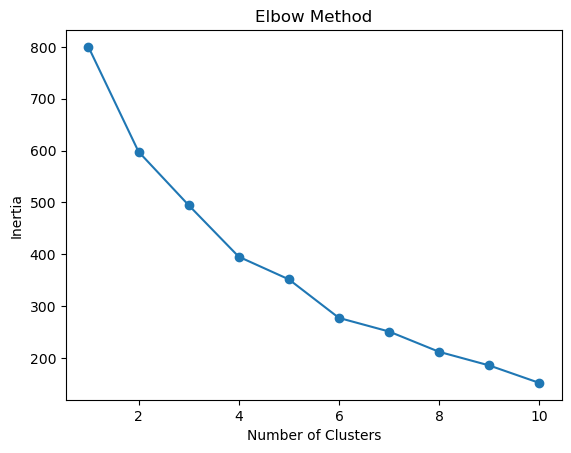

In [16]:

# Clustering using K-Means
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


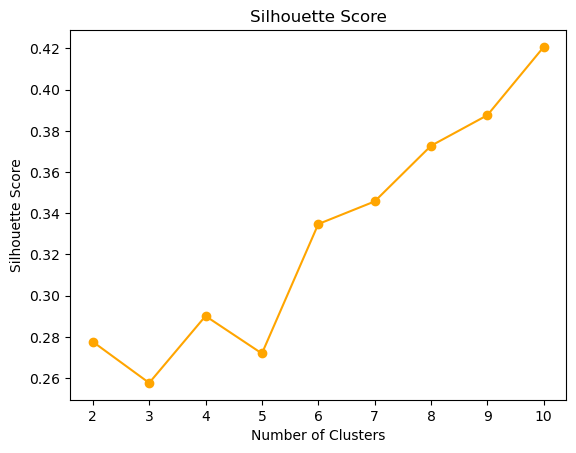

In [17]:
# Using silhouette score to validate
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()


In [18]:
# Final K-Means clustering with chosen K
optimal_k = 5  # Based on elbow and silhouette method analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

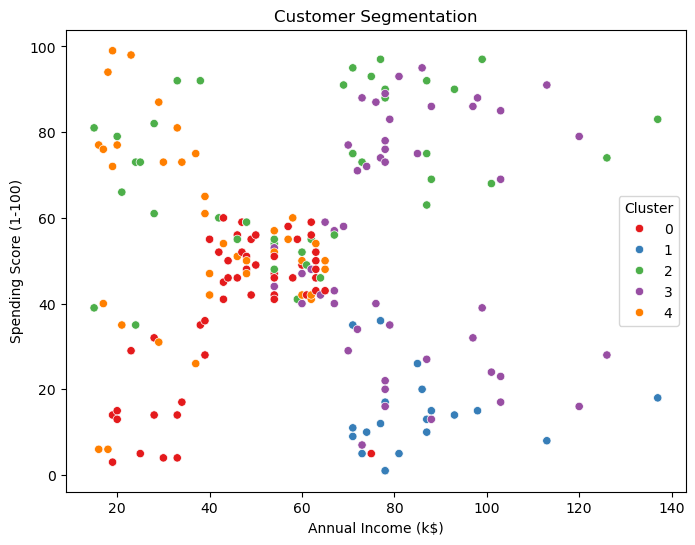

In [19]:
# Visualizing the Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'],
                hue=customer_data['Cluster'], palette='Set1')
plt.title("Customer Segmentation")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


In [20]:
# Cluster Characteristics
print(customer_data.groupby('Cluster').mean())

# Summary and Recommendations
# "Provide business insights for each cluster, such as high-spending customers, low-income groups, etc."


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


In [23]:
cluster_summary = customer_data.groupby('Cluster').mean()
print(cluster_summary)

# Saving the processed data and results
customer_data.to_csv('Customer_Segmentation_Results.csv', index=False)
print("Clustered data saved to Customer_Segmentation_Results.csv")

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  
Clustered data saved to Customer_Segmentation_Results.csv


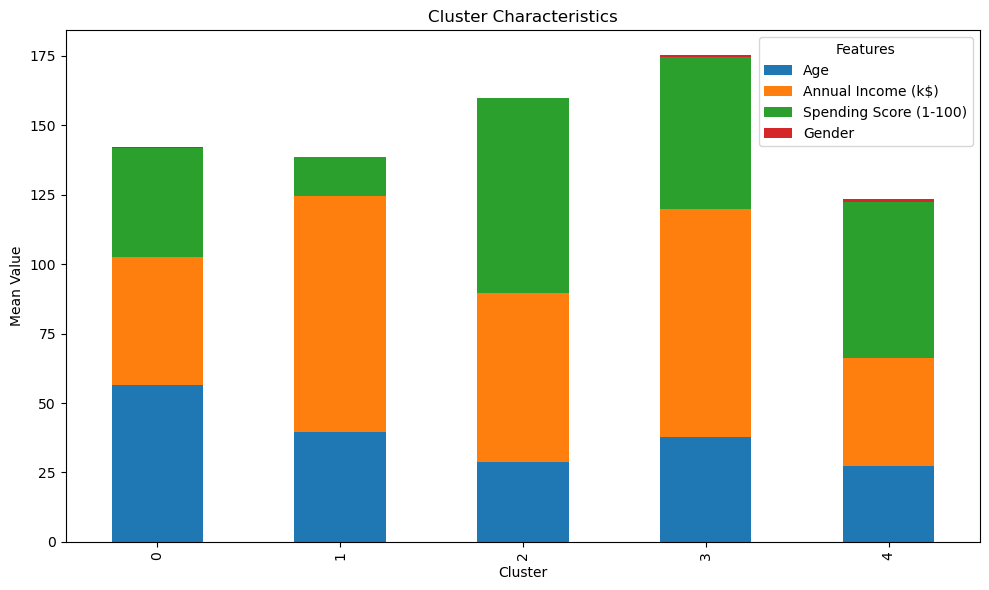

Cluster 0: Focus on retaining high-income, high-spending customers with premium offers.
Cluster 1: Target low-income, high-spending customers with budget-friendly deals.
Cluster 2: Engage middle-income customers by promoting loyalty programs.
Cluster 3: Explore opportunities to convert low-income, low-spending customers into active buyers.
Cluster 4: Target young, tech-savvy customers with personalized digital marketing.


In [24]:
# Additional Visualization: Cluster Characteristics
cluster_summary[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Cluster Characteristics")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.legend(title="Features")
plt.tight_layout()
plt.show()

# Recommendations and Insights
# Based on the clusters, provide actionable insights.
recommendations = {
    0: "Focus on retaining high-income, high-spending customers with premium offers.",
    1: "Target low-income, high-spending customers with budget-friendly deals.",
    2: "Engage middle-income customers by promoting loyalty programs.",
    3: "Explore opportunities to convert low-income, low-spending customers into active buyers.",
    4: "Target young, tech-savvy customers with personalized digital marketing."
}

for cluster, insight in recommendations.items():
    print(f"Cluster {cluster}: {insight}")
